# Ενότητα Α: Μετρητές Morris


Αθανάσιος Κουκουλιάτας 3256

Άννα Διαμαντοπούλου 4050

Καλιόπη Οικονόμου 5099

In [1]:
# imports

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fractions import Fraction
import math

## Άσκηση 1

### α)

Τελική τιμή του C: 19
Τελική εκτίμηση: 524287


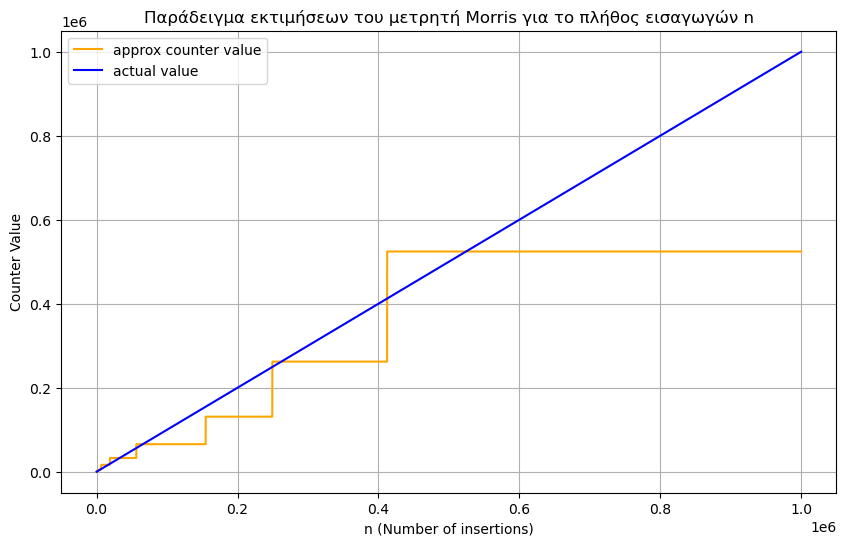

In [2]:

# Αρχικοποίηση της μεταβλητής C
C = 0

# Λίστες για αποθήκευση τιμών
n_values = [] # Αριθμός εισαγωγών
approx_values = []  # Εκτιμήσεις μετρητή

# Morris insert function 
def insert():
    global C
    if random.random() < 1 / (2 ** C):  # C=C+1 με πιθανότητα: p = 1 / (2^C)
        C += 1

# Morris query function
def query():
    return (2 ** C) - 1  # εκτίμηση του πλήθους 



with open("morris_output_a.txt", "w") as f:
    # Εκτέλεση για 1.000.000 εισαγωγές και εκτύπωση της εκτίμησης μετά από κάθε εισαγωγή
    for i in range(1, 1_000_001):   # τα '_' αγνοούνται κατά την εκτέλεση - είναι για λόγους αναγνωσιμότητας
        insert()
        n_values.append(i)
        approx_values.append(query())
        #print(f"Μετά την εισαγωγή #{i}: Εκτίμηση = {query()}") 
        #Εξαιτίας του πλήθους των εισαγωγών, δεν είναι ευανάγνωστα με 'print()', οπότε τα αποθηκεύσαμε στο αρχείο 'morris_output_a.txt'
        f.write(f"{i},{query()}\n")  # Γράφουμε σε αρχείο: εισαγωγή, εκτίμηση

    
    
# Τελικά αποτελέσματα
print(f"Τελική τιμή του C: {C}")
print(f"Τελική εκτίμηση: {query()}")

# Γράφημα
plt.figure(figsize=(10, 6))
plt.plot(n_values, approx_values, label='approx counter value', color='orange')
plt.plot(n_values, n_values, label='actual value', color='blue', linestyle='-')
plt.xlabel('n (Number of insertions)')
plt.ylabel('Counter Value')
plt.title('Παράδειγμα εκτιμήσεων του μετρητή Morris για το πλήθος εισαγωγών n')
plt.legend()
plt.grid(True)
plt.show()


### Αποτελέσματα (από μία εκτέλεση)
Τελική τιμή του C: 20

Τελική εκτίμηση: 1048575


Επαλήθευση

Εκτίμηση = query() = (2^C)-1
(C = 20) => Εκτίμηση = 2^20-1 = 1.048.576-1 = 1.048.575

όπου 1e6 = 1*10^6 = 1.000.000



### β1)

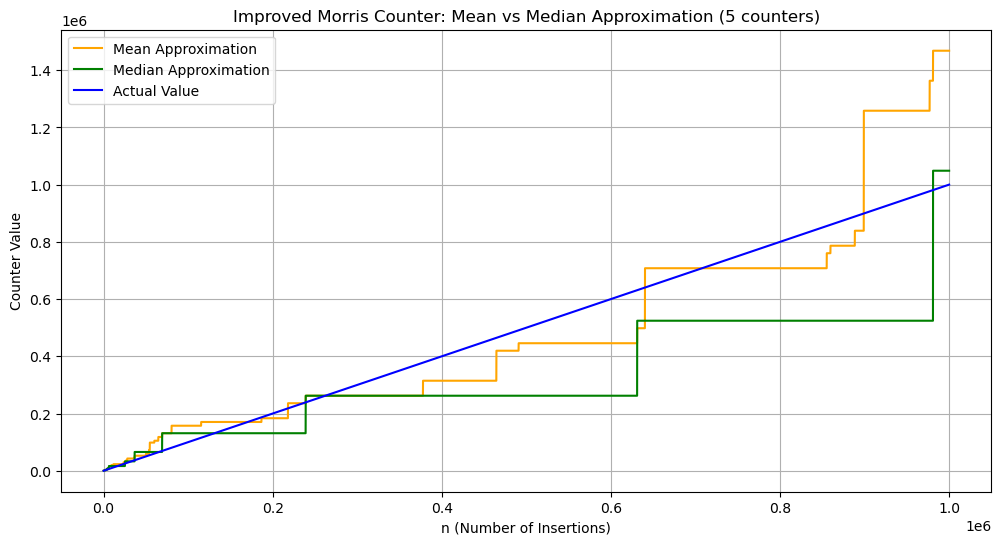

In [3]:
# Εκτίμηση του n είτε ως μέσο όρο, είτε ως διάμεσο απο τις αντίστοιχες τιμές των C

# Αρχικοποίηση 5 μετρητών Morris
num_counters = 5
C = [0] * num_counters  # [C1, C2, ..., C5]  -> [0, 0, 0, 0, 0]

# Λίστες για αποθήκευση των εκτιμήσεων
n_values = []
mean_estimations = []
median_estimations = []


def insert():
    global C
    for i in range(num_counters):
        if random.random() < 1 / (2 ** C[i]):
            C[i] += 1


def query(method):
    if method == "mean":
        return sum([2 ** c - 1 for c in C]) / len(C)  # SUM(2^c -1) / NUM_COUNTERS  = {(2^C1 -1)+(2^C2 -1)+...+(2^C5 -1)}/5
    elif method == "median":
        return 2 ** np.median(C) - 1  # 2^median([C1,C2,...,C5]) - 1
    else:
        raise ValueError("method must be 'mean' or 'median'")

with open("morris_output_b.txt", "w") as f:
    f.write("insertion , mean_estimate, median_estimate\n")  # κεφαλίδα αρχείου

    
    # Εκτέλεση για 1.000.000 εισαγωγές
    for i in range(1, 1_000_001):
        insert()
        n_values.append(i)
        mean_estimations.append(query("mean"))
        median_estimations.append(query("median"))
        
        counters_str = "[" + ", ".join(str(c) for c in C) + "]"  # μετατροπή λίστας σε string για το αρχείο

        f.write(f"{i},{query('mean')},{query('median'),{counters_str}}\n") # Αντίστοιχα, γράφει στο αρχείο εξαιτίας μεγέθους δεδομένων - για λόγους ελέγχου

# Γράφημα
plt.figure(figsize=(12, 6))
plt.plot(n_values, mean_estimations, label='Mean Approximation', color='orange')
plt.plot(n_values, median_estimations, label='Median Approximation', color='green')
plt.plot(n_values, n_values, label='Actual Value', color='blue', linestyle='-')

plt.xlabel('n (Number of Insertions)')
plt.ylabel('Counter Value')
plt.title('Improved Morris Counter: Mean vs Median Approximation (5 counters)')
plt.legend()
plt.grid(True)
plt.show()


### Αποτελέσματα (από μία εκτέλεση)

Από το νέο αρχείο που δημιουργήθηκε με τα αποτελέσματα έχουμε :


        insertion , mean_estimate, median_estimate [counters]

    (Α)   1,1.0,(1.0, {'[1, 1, 1, 1, 1]'})  

    (Β)   2,1.4,(1.0, {'[1, 1, 1, 1, 2]'})

    ...

    (Γ)   10,9.4,(7.0, {'[3, 3, 4, 4, 2]'})


#### Επαλήθευση

(Α)  C = [1, 1, 1, 1, 1]    - insertion: 1

    Mean:
    {5⋅((2^1)−1)}/5 = 5(1/5) = 1.0

    Median:
    (2^1)−1 = 1


(Β)  C = [1, 1, 1, 1, 2]   - insertion: 2

    Mean:
    {4⋅((2^1)−1)+((2^2)−1)}/5 = (4+3)/5 = 7/5 = 1.4
    

    Median:
    (2^1)−1 = 1


(Γ)  C = [3, 3, 4, 4, 2]   - insertion: 10

    Mean:
    {2⋅((2^3)-1) + 2⋅((2^4)-1 + ((2^2)-1))}/5 = 
    (14+30+3)/5 = 47/5 = 9.4
    

    Median: [2, 3, 3, 4, 4] → median = 3 (ο 'μεσαίος' από ταξινομημένο πίνακα με αύξουσα σειρά)
    (2^3)−1 = 7


### β2)

   Counters  Mean Relative Error  Median Relative Error
0         5             0.209715               0.219430
1        10             0.139707               0.154280
2        20             0.151330               0.186135
3        50             0.071951               0.197713


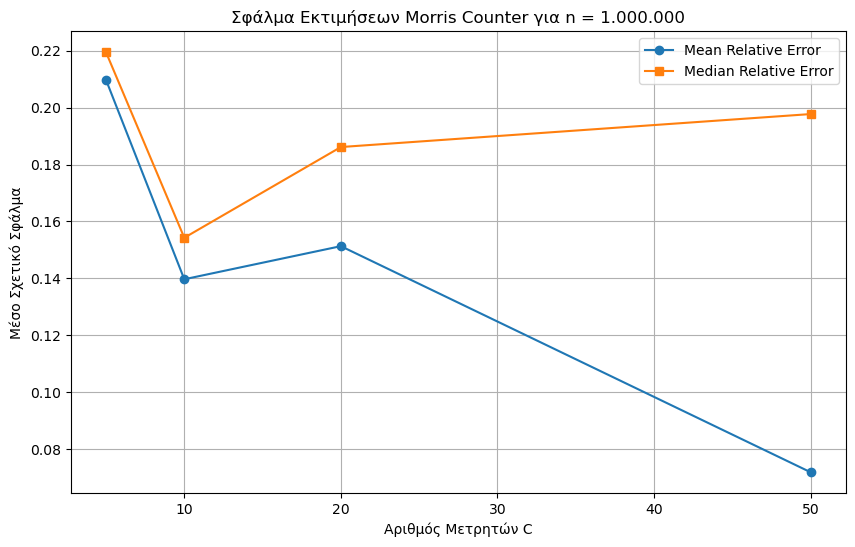

In [4]:

# Πειραματικές παράμετροι
n_insertions = 1_000_000
num_trials = 20
counter_sizes = [5, 10, 20, 50]

results = []

for num_counters in counter_sizes:
    mean_errors = []
    median_errors = []

    for _ in range(num_trials):
        # Αρχικοποίηση των C πριν από κάθε trial σε μηδέν
        C = [0] * num_counters

        for _ in range(n_insertions):
            insert()

        mean_est = query("mean") 
        median_est = query("median")

        # Υπολογισμός σχετικού σφάλματος κάθε εκτίμησης
        mean_errors.append(abs(mean_est - n_insertions) / n_insertions)
        median_errors.append(abs(median_est - n_insertions) / n_insertions)

    results.append({
        'Counters': num_counters,
        'Mean Relative Error': np.mean(mean_errors),    # μέσος όρος σφαλμάτων από τις εκτιμήσεις με query('mean') 
        'Median Relative Error': np.mean(median_errors) # μέσος όρος σφαλμάτων από τις εκτιμήσεις με query('median')
    })

# Εμφάνιση σε πίνακα
df = pd.DataFrame(results)
print(df)

# Γράφημα
plt.figure(figsize=(10, 6))
plt.plot(df['Counters'], df['Mean Relative Error'], label='Mean Relative Error', marker='o')
plt.plot(df['Counters'], df['Median Relative Error'], label='Median Relative Error', marker='s')
plt.xlabel('Αριθμός Μετρητών C')
plt.ylabel('Μέσο Σχετικό Σφάλμα')
plt.title('Σφάλμα Εκτιμήσεων Morris Counter για n = 1.000.000')
plt.grid(True)
plt.legend()
plt.show()




α) 
Για να αξιολογήσουμε την ακρίβεια του Morris μετρητή υπό επαναληπτική τυχαιότητα, υλοποιήσαμε 20 ανεξάρτητα πειράματα για διαφορετικά πλήθη μετρητών C∈{5,10,20,50}, εκτελώντας κάθε φορά 1.000.000 εισαγωγές στοιχείων.

Για κάθε trial υπολογίσαμε την εκτίμηση του πλήθους με μέσο όρο (query(mean)) και την εκτίμηση με διάμεσο (query(median)) των αντίστοιχων counters

Υπολογίζουμε το μέσο σχετικό σφάλμα κάθε μεθόδου, δηλαδή : |query()-n|/n και τα αναπαριστούμε σε έναν πίνακα


**Πίνακας Αποτελεσμάτων από τυπώσεις**

| Counters| Mean Relative Error | Median Relative Error |
|---------------------|-----------------------------|-------------------------------|
| 5                   | 0.183577                      | 0.326215                        |
| 10                  | 0.179414                      | 0.175997                        |
| 20                  | 0.138666                      | 0.176357                        |
| 50                  | 0.057124                      | 0.101787                        |



**Παρατηρήσεις από το γράφημα**


Το σφάλμα της διαμέσου είναι μεγαλύτερο για μικρό αριθμό counter (π.χ. 5), ενώ φαίνεται να μειώνεται όσο αυξάνονται οι μετρητές. Από περίπου 20 μετρητές και πάνω ο μέσος όρος είναι καθαρά πιο αξιόπιστος από τη διάμεσο. 

Η μέθοδος του μέσου όρου δίνει καλύτερη ακρίβεια σε μικρότερο πλήθος μετρητών.

Για πρακτικές εφαρμογές όπου ο χώρος είναι περιορισμένος (λίγα bits), ο μέσος όρος με ~20 counters προσφέρει καλύτερη προσέγγιση.

Η διάμεσος είναι χρήσιμη για αύξηση της σταθερότητας αποτελέσματος, αλλά απαιτεί περισσότερους counters για να φτάσει χαμηλό σφάλμα.

Παρατηρούμε επίσης ότι για 10 μετρητές το σχετικό σφάλμα του μέσου όρου και της διαμέσου είναι σχεδόν ίσο. Αυτό δείχνει ότι σε αυτό το σημείο (γύρω στους 10 μετρητές), οι δύο μέθοδοι συγκλίνουν σε παρόμοια ακρίβεια. Δηλαδή, η διάμεσος έχει ήδη βελτιωθεί αρκετά, ενώ ο μέσος όρος διατηρεί τη σταθερά καλή επίδοσή του.

Ωστόσο, όσο αυξάνεται περαιτέρω το πλήθος μετρητών (π.χ. στους 50), η υπεροχή του μέσου όρου γίνεται πιο έντονη, καθώς το σφάλμα του μειώνεται σημαντικά σε σύγκριση με της διαμέσου.



β) Πόσο χώρο απαιτεί ο ακριβής μετρητής


Για να μετρήσουμε μέχρι n=1.000.000 :
- Ένας απλός μετρητής (ακριβής)

    Χρειάζεται:  ⌈log₂(n+1)⌉ = ⌈log₂(1.000.001)⌉ = ⌈19.9315..⌉ = 20 bits
 
   
   
- Morris με 1 counter

    Χρειάζεται: 
    
    ⌈log₂(log₂(n))⌉ = ⌈log₂(19.9315..)⌉ = ⌈4.316..⌉≈ ⌈4.3⌉ = 5 bits
  
 
 
- Morris με 5 counters 

    Κάθε C χρειάζεται: 5 bits

    Με 5 μετρητές: 5 * 4.3 = 21.5 bits θεωρητικά, αλλά πρακτικά χρειάζεται 5*5 = 25 bits


**Συμπέρασμα**

Ο Morris με 5 ανεξάρτητες μεταβλητές C χρειάζεται περισσότερο χώρο (25 bits) από τον ακριβή μετρητή (20 bits) για n=1.000.000.
Επομένως ο Morris με 5 counters δεν προσφέρει όφελος σε χώρο για n = 1.000.000 και άρα είναι προτιμότερο να χρησιμοποιηθεί απλός ακριβής μετρητής αφού θα είναι και τα αποτελέσματα ακριβή - όχι εκτιμήσεις και παράλληλα θα έχει και λιγότερο χώρο κατά 5 bits.



γ) Το πλεονέκτημα του Morris εμφανίζεται μόνο όταν το n είναι πολύ μεγαλύτερο, όταν η log₂(n) δηλαδή γίνεται μεγάλη, και η counters*log₂(log₂(n)) παραμένει μικρότερη.

Συγκεκριμένα για να έχουμε κέρδος στον χώρο με μετρητή Morris με 5 counters θέλουμε:

Bits του Morris < Bits του ακριβούς μετρητή

5*⌈log2(log2(n))⌉  <  ⌈log⁡2(n+1)⌉ => (προσεγγιστική λύση, χωρίς ⌈⌉)

5*log2(x) < x (όπου x = log2(n)) 

(Δοκιμές ...)
(        x:8  -- 5log(8)=15   < x:8  δεν ισχύει)
(        x:16 -- 5log2(16)=20 < x:16 δεν ισχύει)
(        x:32 -- 5log2(32)=25 < x:32 ισχύει)

Αν x = log2(n) = 25 => n = 2^25 = 33,554,432



**Έλεγχος** 


5*⌈log2(log2(n))⌉  <  ⌈log⁡2(n+1)⌉ =

5*⌈log2(log2(33,554,432))⌉  <  ⌈log⁡2(33,554,433)⌉ ≈

5*⌈log2(25)⌉ < ⌈25.0000005⌉ 

5*5 < 26 

25 < 26 Η ανίσωση επαληθεύεται, άρα n = 33,554,432


Μόνο για πολύ μεγάλα n (n > 33,554,432) αρχίζει να έχει νόημα η χρήση πολλών μετρητών Morris για εξοικονόμηση μνήμης σε βάρος της ακρίβειας.

## Άσκηση 2


### α)

In [5]:

# Χρησιμοποιούμε την Fraction γιατί χειρίζεται κλάσματα με ακρίβεια, Fraction(a,b) = a/b

n = 1000  # πλήθος εισαγωγών
max_c = 30  

# prob_matrix[i][c] = πιθανότητα να έχεις τιμή C = c μετά από i εισαγωγές
prob_matrix = [[Fraction(0) for _ in range(max_c)] for _ in range(n + 1)]
prob_matrix[0][0] = Fraction(1)  # αρχικά: 0 εισαγωγές, C = 0 με πιθανότητα 1

for i in range(1, n + 1):
    for c in range(max_c):
        # Αν το προηγούμενο C ήταν c:
        increase_prob = Fraction(1, 2 ** c)  # η πιθανότητα να αυξηθεί ο μετρητής C κατά 1
        stay_prob = 1 - increase_prob        # η πιθανότητα να παραμείνει ίδιος ο μετρητής C
        
        
        prob_matrix[i][c] += prob_matrix[i - 1][c] * stay_prob # + πιθανότητα να μείνουμε στο ίδιο c
        # ήμουν c έμεινα στο c
        
        if c > 0:
            prob_matrix[i][c] += prob_matrix[i - 1][c - 1] * Fraction(1, 2 ** (c - 1)) # + πιθανότητα να αλλάξει το c
        # ήμουν c-1 έγινα c
            
    # π.χ.
    # C=3
    #    - ήσουν 3 και έμεινες 3     prob_matrix[i][3] += prob_matrix[i-1][3] * stay_prob
    #    - ήσουν 2 και πήγες   3     prob_matrix[i][3] += prob_matrix[i-1][2] * (1 / (2^(2)))
    
    # προσθέτω τα αποτελέσματα των δύο σεναρίων  
    
            
# Υπολογισμός ζητούμενης πιθανότητας:
desired_values = [8, 9, 10, 11]
total_prob = sum(prob_matrix[n][c] for c in desired_values) 

# Εκτύπωση σε μορφή κλάσματος και δεκαδική
print("Πιθανότητα ως κλάσμα:", total_prob)
print("Πιθανότητα σε δεκαδική μορφή:", float(total_prob))



Πιθανότητα ως κλάσμα: 283920151123550121225534317251034974759981037468460124756485915729664145536193227446841600683089029321064037360033972196975520721313967283246482960877768973497509588269485043240543005151533688898891482353847442981703873436286125407337852316911652564226336911746208854859691745406773917283282109532706959290123941043157969015981949979704414961062133455688193457927083679587809001030199565972012949999376159728261688394269154397662034041317912072797995501766430171586514577821953502779796911736745567394877087265738328596488583187551744369349342042499945848274409810356656140349684777382609510350051968439189779984179398505886123489025475620867969733900347586418374613730248359856148389149992482512339624564696528182446889770229975377658827588000662425661273603970235317518101613600798224941230427005378387971143390404699718166542666001391353985679102823889152190572613628669900457956456552313999268451603608203994505641100891076815831978767369585366298314396892266097552819618556

### β)

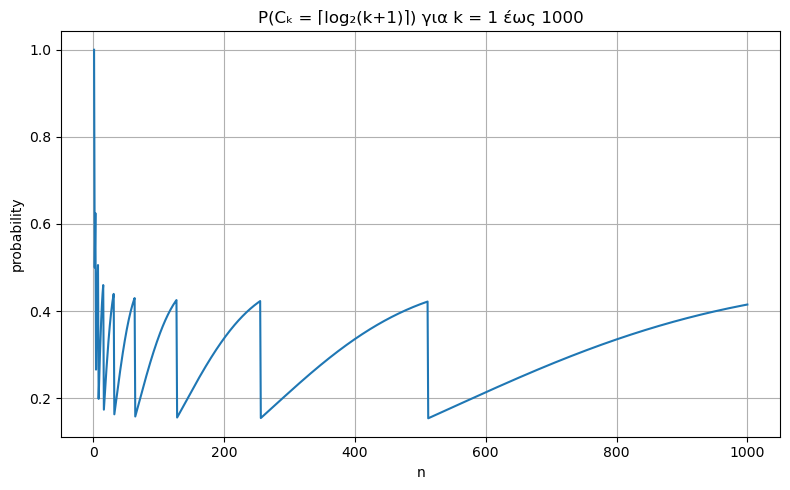

In [6]:
# Για κάθε τιμή k ανήκει {1,2,...,1000}:
# Θέλουμε να υπολογίσουμε την πιθανότητα ο Morris μετρητής C να είναι ίσος με ⌈log2(k+1)⌉
#     και να φτιάξουμε γράφημα με αυτές τις πιθανότητες ως συνάρτηση του k

# Μέγιστος αριθμός εισαγωγών
n_max = 1000
max_c = 30

probs = []  # πιθανότητες για κάθε k


for k in range(1, n_max + 1):  # Για κάθε k 
    
    # Δημιουργώ πίνακα prob_matrix : μεγέθους:{k+1 * max_c}
    prob_matrix = [[Fraction(0) for _ in range(max_c)] for _ in range(k + 1)] # αρχικοποιώ τις τιμές των πιθανοτήτων σε 0 - με απόλυτη ακρίβεια (Fraction(0))
    prob_matrix[0][0] = Fraction(1)

    for i in range(1, k + 1):
        for c in range(max_c):
            increase_prob = Fraction(1, 2 ** c)
            stay_prob = 1 - increase_prob
            prob_matrix[i][c] += prob_matrix[i - 1][c] * stay_prob
            if c > 0:
                prob_matrix[i][c] += prob_matrix[i - 1][c - 1] * Fraction(1, 2 ** (c - 1))

   
    ck_target = math.ceil(math.log2(k + 1)) # η ζητούμενη τιμή για κάθε k
    prob = float(prob_matrix[k][ck_target])
    probs.append(prob)

# Σχεδίαση γραφήματος
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_max + 1), probs)
plt.xlabel('n')  # k 
plt.ylabel('probability')
plt.title('P(Cₖ = ⌈log₂(k+1)⌉) για k = 1 έως 1000')
plt.grid(True)
plt.tight_layout()
plt.show()


### Παρατηρήσεις

Η πιθανότητα να πάρει ο C_k την τιμή ⌈log⁡2(k+1)⌉ εμφανίζει περιοδική πτώση μόλις το k+1 περάσει κάποια δύναμη του 2 (θεωρητικά).

#### Γενικά
Οι λογάριθμοι βάσης 2 δίνουν ακέραιο αποτέλεσμα όταν το k+1 είναι δύναμη του 2.
Όταν το k+1 είναι ακριβώς δύναμη του 2 τότε:
- ο λογάριθμος είναι ακέραιος
- το c_k δεν αλλάζει ακόμα


Μόλις ξεπεράσει το k+1 μία δύναμη του 2 τότε:
- το c_k αυξάνεται κατά 1

Δηλαδή, κάθε φορά που αλλάζει (αυξάνεται) η ακέραιη τιμή της λογαριθμικής εκτίμησης (c_k), η αντίστοιχη πιθανότητα πέφτει και ξεκινά ξανά από χαμηλά. Αυτό συμβαίνει επειδή ο μετρητής Morris χρειάζεται χρόνο για να 'φτάσει' τη νέα τιμή, καθώς η πιθανότητα αύξησης του C γίνεται όλο και μικρότερη όσο μεγαλώνει το C, με αποτέλεσμα να εμφανίζει μεγαλύτερη διασπορά γύρω από την αναμενόμενη τιμή.

Παράδειγμα

    - k+1 = 8 : log2(8) = 3 => ck=3

    - k+1 = 9 : log2(9) = 3.17.. => ck=4

Μόλις το k+1 ξεπεράσει το 8, η ακέραια λογαριθμική πρόβλεψη αλλάζει από 3 σε 4

Για να φτάσει C=4 χρειάζεται αύξηση C από C=3 με πιθανότητα 1/(2^C) = 1/(2^3) = 
1/8

Και πριν από αυτό, από C=2 με πιθανότητα 1/4 (και αντίστοιχα αναδρομικά από C=0 συναθροίζονται οι πιθανότητες)

Οπότε η πιθανότητα να βρίσκεται ακριβώς στη νέα τιμή c_k = 4 είναι μικρή αμέσως μετά το άλμα 




### γ)

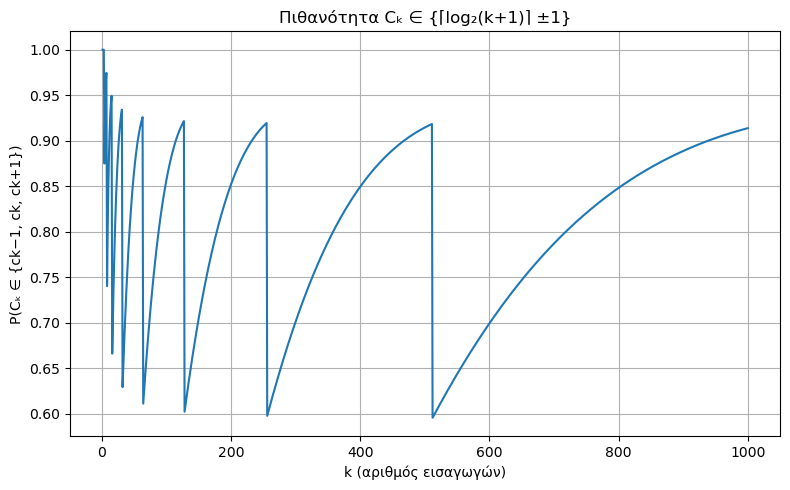

In [7]:

n_max = 1000
max_c = 30

probs_ck_neighbors = []  # θα κρατά την πιθανότητα P(Ck ∈ {ck−1, ck, ck+1})

for k in range(1, n_max + 1):

    # Πίνακας πιθανότητας: i = αριθμός εισαγωγών, c = τιμή μετρητή
    prob_matrix = [[Fraction(0) for _ in range(max_c)] for _ in range(k + 1)]
    prob_matrix[0][0] = Fraction(1)

    for i in range(1, k + 1):
        for c in range(max_c):
            increase_prob = Fraction(1, 2 ** c)
            stay_prob = 1 - increase_prob
            prob_matrix[i][c] += prob_matrix[i - 1][c] * stay_prob
            if c > 0:
                prob_matrix[i][c] += prob_matrix[i - 1][c - 1] * Fraction(1, 2 ** (c - 1))

    # Υπολογισμός πιθανότητας C_k in {ck−1, ck, ck+1}
    ck_target = math.ceil(math.log2(k + 1))
    c_window = [ck_target - 1, ck_target, ck_target + 1]
    prob = 0 
    for c in c_window:  # για κάθε c : {ck−1, ck, ck+1}
        if 0 <= c < max_c:  # έλεγχος ότι δεν ξεφεύγει από τα όρια του πίνακα
            prob += prob_matrix[k][c]  # + την αντίστοιχη πιθανότητα

    probs_ck_neighbors.append(float(prob))  

# Γράφημα
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_max + 1), probs_ck_neighbors)
plt.xlabel('k (αριθμός εισαγωγών)')
plt.ylabel('P(Cₖ ∈ {ck−1, ck, ck+1})')
plt.title('Πιθανότητα Cₖ ∈ {⌈log₂(k+1)⌉ ±1}')
plt.grid(True)
plt.tight_layout()
plt.show()


### Παρατηρήσεις

Το γράφημα δείχνει την πιθανότητα:
P(Ck∈{⌈log⁡2(k+1)⌉−1, ⌈log⁡2(k+1)⌉, ⌈log⁡2(k+1)⌉+1})

Δηλαδή, η πιθανότητα ο Morris μετρητής να βρίσκεται κοντά στην αναμενόμενη τιμή (±1)

Αυτό δείχνει ότι ακόμα και αν δεν επιτυγχάνει ακριβώς τη τιμή Ck=⌈log⁡2(k+1)⌉, ο Morris έχει στατιστικά υψηλή πιθανότητα να προσεγγίζει καλά την εκτίμηση του πλήθους. 

Οι πιθανότητες είναι εμφανώς υψηλότερες σε σχέση με το (β), κάτι που εξηγείται από το γεγονός ότι εδώ προστίθενται τρεις γειτονικές τιμές αντί για μία:


P(Ck∈{⌈log⁡2(k+1)⌉−1, ⌈log⁡2(k+1)⌉, ⌈log⁡2(k+1)⌉+1}) = 

P(Ck=ck−1)+P(Ck=ck)+P(Ck=ck+1)


Αυτό καθιστά τον Morris πιο σταθερά αξιόπιστο.


Η χαρακτηριστική πτώση στις πιθανότητες κάθε φορά που το k+1 περνάει δύναμη του 2 εξακολουθεί να υπάρχει για τους ίδιους λόγους,
αλλά είναι **πιο ήπια** σε σχέση με το (β). Η συνολική πιθανότητα παραμένει συνήθως πάνω από 0.6 όπως βλέπουμε στο γράφημα,  
λόγω της εξομάλυνσης που προκαλεί η συμπερίληψη των τιμών c_k ± 1.



### δ)

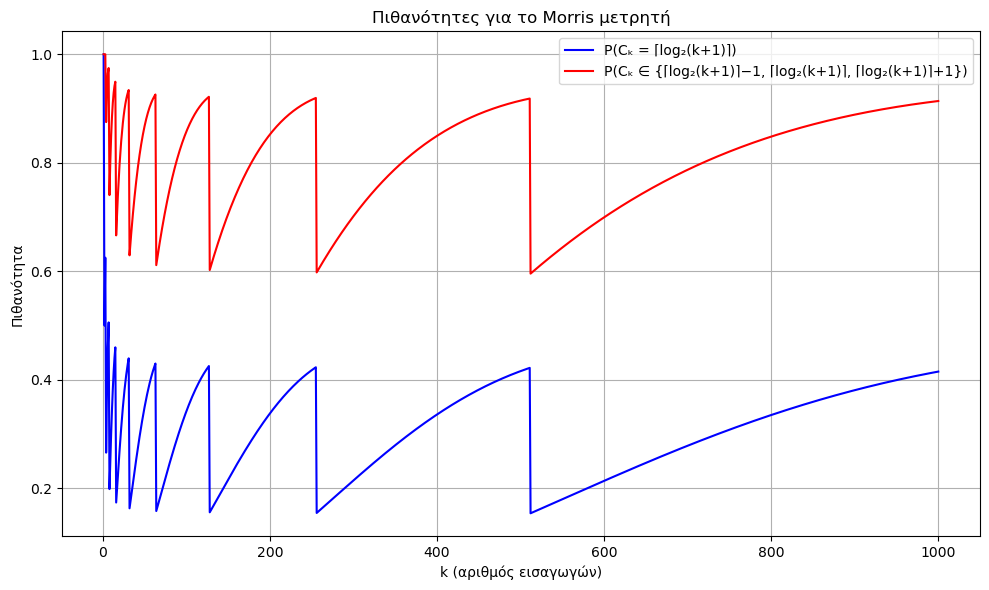

In [8]:

# Παράμετροι
n_max = 1000   
max_c = 30     

prob_exact = []   # για την αποθήκευση : P(C_k = ⌈log₂(k+1)⌉)
prob_near  = []   #                      P(C_k ∈ {⌈log₂(k+1)⌉-1, ⌈log₂(k+1)⌉, ⌈log₂(k+1)⌉+1})


for k in range(1, n_max + 1):

    prob_matrix = [[Fraction(0) for _ in range(max_c)] for _ in range(k + 1)]
    prob_matrix[0][0] = Fraction(1)  # αρχική κατάσταση: 0 εισαγωγές, C=0 με πιθανότητα 1

    
    for i in range(1, k + 1):
        for c in range(max_c):
            increase_prob = Fraction(1, 2 ** c)
            stay_prob = 1 - increase_prob
            
            prob_matrix[i][c] += prob_matrix[i - 1][c] * stay_prob

            if c > 0:
                prob_matrix[i][c] += prob_matrix[i - 1][c - 1] * Fraction(1, 2 ** (c - 1))
    
    # l(k) = ⌈log₂(k+1)⌉
    l_k = math.ceil(math.log2(k + 1))
    
    # (1) Πιθανότητα να είναι ακριβώς l(k):
    exact = float(prob_matrix[k][l_k])
    prob_exact.append(exact)
    
    # (2) Πιθανότητα να ανήκει στο σύνολο {l(k)-1, l(k), l(k)+1}
    near = 0.0
    for c in [l_k - 1, l_k, l_k + 1]:
        if 0 <= c < max_c:
            near += float(prob_matrix[k][c])
    prob_near.append(near)

# Γράφημα
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_max + 1), prob_exact, label="P(Cₖ = ⌈log₂(k+1)⌉)", color='blue')
plt.plot(range(1, n_max + 1), prob_near, label="P(Cₖ ∈ {⌈log₂(k+1)⌉−1, ⌈log₂(k+1)⌉, ⌈log₂(k+1)⌉+1})", color='red')
plt.xlabel("k (αριθμός εισαγωγών)")
plt.ylabel("Πιθανότητα")
plt.title("Πιθανότητες για το Morris μετρητή")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Η **Βασική Διαφορά** είναι ότι σε αυτό το ερώτημα εξετάζουμε τη πιθανότητα να ισχύει ταυτόχρονα η ιδιότητα για όλα τα k από 1 έως 1000, δηλαδή:

    -Είτε ότι για κάθε k, ο μετρητής Morris επιστρέφει ακριβώς την τιμή l(k)=⌈log⁡2(k+1)⌉l(k)=⌈log2(k+1)⌉

    -Είτε ότι για κάθε k, ο μετρητής επιστρέφει τιμή στο σύνολο {l(k)−1, l(k), l(k)+1}{l(k)−1, l(k), l(k)+1}
    
Σε αντίθεση με τα προηγούμενα ερωτήματα (β) και (γ), όπου εξετάζαμε κάθε k ξεχωριστά, εδώ απαιτούμε η συνθήκη να ισχύει συνεχόμενα και αδιάλειπτα για όλη την πορεία των εισαγωγών, από το 1 έως το 1000.

Η προσέγγιση σε αυτό το ερώτημα είναι πιο αυστηρή και ολιστική. Δεν μελετάμε τη συμπεριφορά του Morris για μεμονωμένα k, αλλά το κατά πόσο μπορεί να είναι "σωστός" συνεχώς σε όλη τη διάρκεια των εισαγωγών.

## Άσκηση 3


Ο Morris μετρητής χρειάζεται: ⌈log₂(log₂(n))⌉ bits 


Για n=1.000.000:

⌈log₂(log₂(n))⌉ = ⌈log₂(19.9315..)⌉ = ⌈4.316..⌉≈ ⌈4.3⌉ = 5 bits

Οπότε τα 8 bits μνήμης που διαθέτουμε είναι περισσότερα από όσα χρειαζόμαστε κατά 3 bits.



O **'κλασικός' Morris** μετρητής αυξάνει το C 
    - με πιθανότητα p = 1/(2^c) 
    - και εκτιμά (2^c)-1

O **'γενικευμένος' Morris** μετρητής αυξάνει το C
    - με πιθανότητα p = 1/(α^c),  1 ≤ α ≤ 2
    - και εκτιμά (1/(α-1))((α^c)-1)
    
**Παρατηρήσεις** 
- για α=2 ο 'γενικευμένος' Morris επανέρχεται στον 'κλασικό'. 
- για α=1 έχουμε απόλυτη ακρίβεια - κάθε εισαγωγή αυξάνει τον μετρητή (κανονική καταμέτρηση). Αλλά με βάση τον τύπο του γενικευμένου Morris με α=1 θα είχαμε (0/0) οπότε θα κατέρρεε. Για αυτό, κατά την αναζήτηση των τιμών του α ξεκινάμε από 1.01 μέχρι και 2.


Έχουμε στη διάθεσή μας 8 bits, οπότε ο μέγιστος αριθμός που μπορώ να αναπαραστήσω τον counter είναι (2^8)-1 = 255.

Βέλτιστο α: 1.042673
Εκτίμηση n για C=255: 994568.76


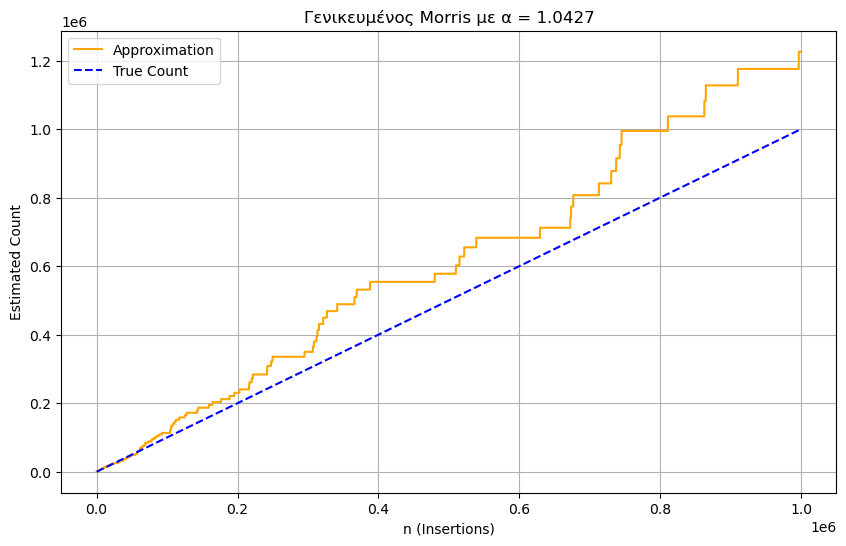

In [9]:
def estimate_n(alpha, C):
    return (1 / (alpha - 1)) * (alpha ** C - 1)

target_n = 1_000_000
C_max = 255  # (2^8)-1 bits

best_alpha = None
best_diff = float('inf')

alpha_search_steps = 10_000  # Πλήθος τιμών του α που θα δοκιμάσουμε

# Ψάχνουμε ανάμεσα στο [1.01, 2] - 10.000 ομοιόμορφα κατανεμημένες τιμές του α
for alpha in np.linspace(1.01, 2.0, alpha_search_steps):  
    est = estimate_n(alpha, C_max) # Υπολογίζουμε εκτίμηση του n με βάση την τρέχουσα τιμή του α
    diff = abs(est - target_n) # σφάλμα - (estimation - επιθυμητό n)
    
    #Αν το σφάλμα είναι μικρότερο από το καλύτερο ως τώρα
    if diff < best_diff:   
        # την 1η φορά που εκτελείται ο βρόχος θα ενημερωθεί η best_alpha 
        #(επειδή diff πάντα είναι μικρότερο του άπειρου που είναι αρχικοποιημένη η best_diff)
        
        best_diff = diff # Κρατάμε το νέο σαν καλύτερο
        best_alpha = alpha # και το αντίστοιχο α

print(f"Βέλτιστο α: {best_alpha:.6f}")
print(f"Εκτίμηση n για C=255: {estimate_n(best_alpha, C_max):.2f}")

C = 0

def insert(alpha):
    global C
    if random.random() < 1 / (alpha ** C):
        C += 1

def query(alpha):
    return (1 / (alpha - 1)) * (alpha ** C - 1)

n_values = []
estimates = []

C = 0  # reset counter -> για να περαστεί σωστά στις συναρτήσεις insert() και query() που το χρησιμοποιούν στο for loop 

for i in range(1, 1_000_001):
    insert(best_alpha) # Εκτελεί εισαγωγή στοιχείου με βάση την πιθανότητα 1 / α^C
    n_values.append(i) # Καταγράφει την πραγματική τιμή των εισαγωγών (n)
    estimates.append(query(best_alpha)) # Καταγράφει την εκτιμώμενη τιμή του πλήθους από τον Morris

    
# Γράφημα    
plt.figure(figsize=(10, 6))
plt.plot(n_values, estimates, label='Approximation', color='orange')
plt.plot(n_values, n_values, label='True Count', linestyle='--', color='blue')
plt.xlabel('n (Insertions)')
plt.ylabel('Estimated Count')
plt.title(f'Γενικευμένος Morris με α = {best_alpha:.4f}')
plt.legend()
plt.grid(True)
plt.show()

